# Boas Vindas

Esse tutorial tem como proposito ensinar o leitor o funcionamento básico da ferramenta pyannote. Existem muitas funcionalidades dentro da framework que não serão abordadas devido ao tempo, o pyannote é dividido em vários repositórios, deixando publico um conjunto ferramentas poderosas, caso o leitor queira dar uma olhada em alguma funcionalidade, consulte [Pyannote](http://pyannote.github.io/). 

**SUMÁRIO**

<ul>
  <li>
      <b>Apresentação do pyannote e sua estrutura: </b> Aqui vamos ver o básico da estrutura do pyannote e como trabalha a framework.
  </li>
  <li>
      <b>Como treinar cada rede do pipeline:</b> Vamos passar por todo o pipeline e aprender a treinar e validar cada modelo.
  </li>
  <li>
      <b>Como usar cada rede do pipeline:</b> Neste momento vamos aprender como usar cada rede de forma separada, como elas se comportam no dado de teste, e como visualizar a saida dos modelos.
  </li>
  <li>
      <b>Como aplicar o ajuste fino:</b> Aprenderemos como aplicar o famoso finetune nos modelos pretreinados do pyannote, e visualizar os benefícios de usar redes pretreinadas.
  </li>
  <li>
      <b>Como usar as redes do pipeline para construir o diarizador:</b> Por fim vamos construir o diarizador, unindo todas as redes do pipeline, e vamos aprender como realizar um ajuste final, além de duas formas de uso do pipeline: pela linha de comando do terminal e pelo código python.
  </li>
</ul>

<div align='center'> 

<img src="https://c.tenor.com/v4EM5Kwotd4AAAAC/e-la-vamos-nos-witch.gif" width="500" height="200"/>

</div>

# Configuração

In [ ]:
#instalando as dependencias

%pip install pyannote.audio==1.1.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<div align="justify"> 

Para a execução deste notebook necessitamos de alguns arquivos externos, para tal, peço que o leitor entre no [git](https://github.com/pyannote/pyannote-audio/tree/master/tutorials/data_preparation). Esse repositório possui o arquivo database.yml que é de extrema importância para lidar com os conjuntos de dados, além disso, possui dois scripts o <b>dowload_ami.sh</b> e <b> download_musan.sh </b>, clone esse repositório, execute os scripts. 

Alguns outros arquivos também são necessários, vai até esse [drive](https://drive.google.com/drive/folders/1bA7qcn9bso8RKooZuTXckZaa4y_ijuIT?usp=sharing) baixe a pasta TutorialPyannote. Suba essa pasta no seu drive pessoal, /drive/MyDrive/TutorialPyannote.

Por fim, esse tutorial requere que os arquivos do repositório, incluindo os arquivos de áudio baixados, sejam subidos no drive, faça o upload na mesma pasta TutorialPyannote. Como aqui é ensinado o processo de treino como um todo, é necessário ter os dados, infelizmente os arquivos são relativamente pesados, e para manter as modificações feitas durante o processo de treino é necessário que sejam executados modificando os arquivos da nuvem. Essa etapa deve demorar mais do que o leitor espera, mas vai ser essencial para seguir com este tutorial.

</div>

É necessário que o diretório de execução seja o mesmo que o arquivo database.yml (logo mais você sabera do que se trata). Se perder a conexão, rode novamente esta linha de comando para garantir que sempre vai estar nesse diretório. 

In [ ]:
%cd ./drive/MyDrive/TutorialPyannote

# Pyannote 1.0 

<div align="justify">

O Pyannote é uma ferramenta open-source escrita em Python para *Speaker Diarization*. Ela é baseada em modelos de machine leanirng, que estão disponíveis na framework PyTorch. Além disso, o Pyannote provê um conjunto de blocos de redes neurais treinadas, que podem ser combinadas para construir o pipeline.

</div>
<br>
<div align="center">
<img src="https://github.com/pyannote/pyannote-audio/raw/master/pipeline.png"/>

<p> Figura - 1 </p>
</div>



## Camada de extração de características

<div align="center"> 

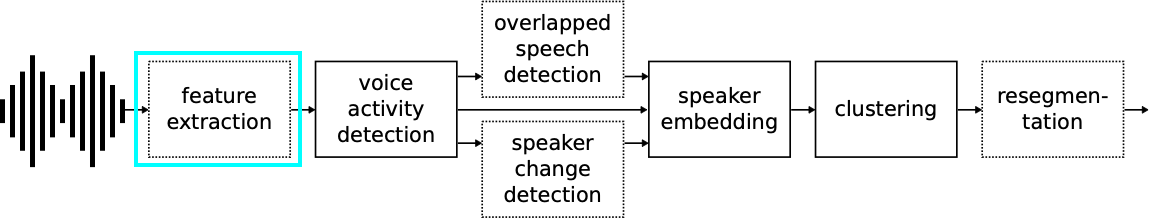

<p> Figura - 2 </p>
</div>

<div align="justify"> 

O Pyannote pode pular a etapa dessa camada, caso o úsuario queira, isso pode ser configurado num arquivo yml, chamado config, esse arquivo não só configura qual sera o extrator, como todos os outros aspectos de treinamento. (mais adiante isso será melhor explicado). Ao optar por pular esta etapa, o úsuario tem que escolher em que forma o dado de entrada é representado, MFCC, Spectrograma, entre outros. Caso ele queria deixar por conta da rede o processo de extração, ele deve configurar como RawAudio. 

</div>
<br>

<div align="center">

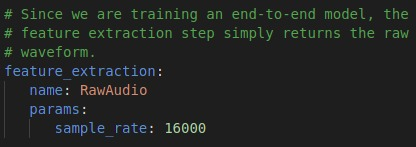

<p> Figura - 3 </p>

</div>

<div align="justify">

Todas as etapas que estão presentes na figura (1) são construidas baseadas num modelo generico chamado de PyanNet, este modelo é autoral do desenvolvedor do Pyannote. Dito isso, podemos entrar em detalhes de como é a rede de extração de características.

</div>


<div align="center">

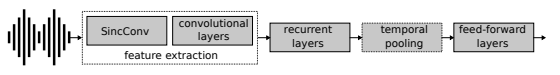

  <p> Figura - 4 </p>

</div>

<div align="center">

</div>

<div align="justify">

A figura (4) é o modelo PyanNet, que foi apresentado acima, ele é um modelo generico, e por isso inclui no começo a parte de "feature extraction". Como dito anteriormente, cada etapa do pipeline é um modelo PyanNet, e essa camada de "feature extraction" está presente quando há o treino individual de cada modelo. Basicamente, essa etapa é composta por um SincConv, que é uma camada de convolução com filtros Sinc. Para quem não lembra sinc é :

</div>

<br>

<div align="center"> <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5b9be54eeed00897083b107d3c6e47b4ffc193f1"/> <p>Figura - 5 </p></div>


<div align="justify">

Além da camada SincConv, o "feature extraction" possui um conjunto de camadas convolucionais. Essa parte que acabamos de descrever da rede PyanNet é a mesma que marcamos na figura (2).

Se o úsuario optar por usar MFCC ou outro tipo de representação, a api Pyannote usa da framework librosa para calcular essas representações.

</div>

## A camada de detecção de falante

<div align="center">

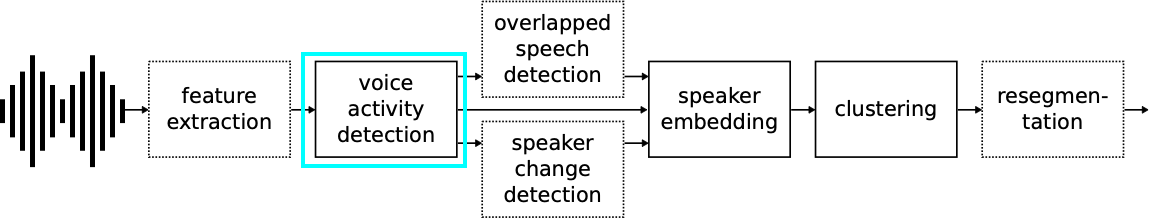

<p>Figura - 6 </p>

</div>

<div align="justify">

Esta etapa do pipeline é o de detecção de falante, ela consiste em avaliar se naquele momento do audio houve fala. A camada é uma classificação binária, onde y é a saida da rede, y está no intervalo [0,1], onde 0 é não houve fala e 1 quando há fala. 

O Pyannote disponibiliza alguns modelos pré-treinados dessa rede, eles podem ser visualizados como se segue.
</div>

<div align="justify">

Como mencionado anteriormente, cada modelo quando treinado precisa de um arquivo config.yml, nele é definido todos os quesitos de treinamento, como qual sera o dado que vai entrar na rede, qual é a arquitetura da rede, qual é o otimizador de treinamento, o processo de data augmentation e a tarefa em questão. 
<br>

</div>

### Como treinar a camada

Vamos começar então verificando o arquivo de configuração.

In [ ]:
!export EXP_DIR="./drive/MyDrive/TutorialPyannote/tutorials/models/speech_activity_detection" && cat ${EXP_DIR}/config.yml


O arquivo tutorials, que foi solicitado para baixar, possui todas as pastas de cada camada do modelo. Individualmente cada camada tem o seu próprio arquivo **config.yml**, que vai configurar o modelo e os hiperparâmetros.



In [ ]:
!pyannote-audio sad train --subset=train --from=0 --to=1 /content/drive/MyDrive/TutorialPyannote/tutorials/models/speech_activity_detection AMI.SpeakerDiarization.MixHeadset

Para se treinar um modelo designado a uma atividade do pipeline, usamos o seguinte comando: 

```
pyannote-audio tarefa train --subset=train --from="epoca inicial" --to="epoca final" local_do_arquivo_config.yml protocolo

```



O protocolo é como definimos o banco de dados usado, ele é configurado no arquivo database.yml.

In [ ]:
!cd ./drive/MyDrive/TutorialPyannote && cat database.yml

O arquivo database.yml possui a seguinte cara:



```
Databases:
  NAME_OF_PROTOCOL:local_to_the_wav_files

Protocols:
  NAME_OF_PROTOCOL:
    Task:
      Name_of_set_of_audios:
        subset_step(train or development or test):
          uri: local_to_the_.lst_file
          annotation: local_to_the_.rttm_file
          annotated: local_to_the_.uem_file


```



**Databases:** é onde você vai escrever o nome do seu protocolo, ou melhor, do seu conjunto de dados, por exemplo VALE.

**Protocols:** é onde todos os procolos serão configurados, com diretórios para os locais dos arquivos necessários, identificando também o passo (treino, validação ou teste).

**Task:** é a atividade, por exemplo SpeakerDiarization.

**Name_of_set_of_audios:** é o nome que você escolhe pro conjunto de áudios que vai trabalhar. Exemplo: Cambio

**subset_step:** o mais intuitivo, é qual etapa você vai realizar, treino, validação ou teste.

**uri:** é o local do arquivo que possui a listagem dos áudios.

**annotation:** é o arquivo .rttm, esse arquivo possui todas rotulações necessárias. Ou seja, ele mapeia o nome do áudio, o intervalo de tempo e o rotulo para aquele intervalo.

**annotated:** é o arquivo .uem, que diz quanto do áudio foi rotulado, por exemplo se o áudio tem 40 segundos e nesse arquivo possui : ... 0 40 ..., significa que todo áudio foi rotulado.


mais sobre o arquivo database.yml pode ser encontrado [aqui](https://github.com/pyannote/pyannote-database#preprocessors)

#### O arquivo .lst

O arquivo .lst, assim como mencionado é um arquivo que contem uma lista do nome dos áudios a serem utilizados no processo em questão (treino, validação ou teste). 

**.lst :**


```
1 ACV0045
2 ACV0089
3 ACV2345
.
.
.
```



#### O arquivo .uem

O arquivo .uem contem o intervalo de tempo que o áudio foi rotulado.


**.uem :**
```
1 ACV0045 1 0.000 40.000
2 ACV0089 1 0.000 60.000
3 ACV2345 1 0.000 90.000
4 NAME_OF_FILE 1 start_time end_time
.
.
.

```



#### O arquivo .rttm

O arquivo .rttm contém as anotações dos áudios nos determinados intervalos de tempo que contém alguma fala.

**.rrtm :**



```
1 SPEAKER ACV0045 1 2.450 1.560 <NA> <NA> MM <NA> <NA>
2 SPEAKER ACV0045 1 4.010 5.424 <NA> <NA> CC <NA> <NA>
3 SPEAKER NAME_OF_AUDIO 1 start_time duration <NA> <NA> rotulo <NA> <NA>
.
.
.

```



### Como validar a camada

Agora que você treinou, e sabe como funciona os arquivos necessários para esta etapa, basta aplicar a validação na nossa camada.

In [ ]:
!pyannote-audio sad validate --subset=development --from=0 --to=1 /content/drive/MyDrive/TutorialPyannote/tutorials/models/speech_activity_detection/AMI.SpeakerDiarization.MixHeadset.train AMI.SpeakerDiarization.MixHeadset

### Como testar a camada

Após validar a camada, podemos agora aplicar sobre os dados de teste.

In [ ]:
!pyannote-audio sad apply --subset=test /content/drive/MyDrive/TutorialPyannote/tutorials/models/speech_activity_detection/AMI.SpeakerDiarization.MixHeadset.train/validate_detection_fscore/AMI.SpeakerDiarization.MixHeadset.development AMI.SpeakerDiarization.MixHeadset


In [ ]:
!cd /content/drive/MyDrive/TutorialPyannote/tutorials/models/speech_activity_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_detection_fscore/AMI.SpeakerDiarization.MixHeadset.development/apply/0010 && cat AMI.SpeakerDiarization.MixHeadset.test.eval

## A camada de Detecção de mudança de falante e de Sobreposição de falante
<div align='center'>

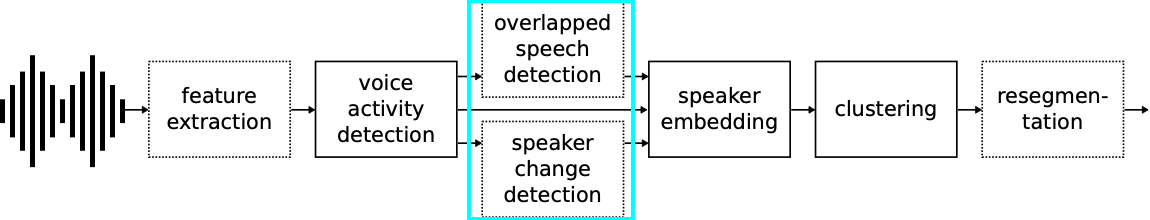

Figura - 7
</div>

Na seção passada abordamos tudo que era necessário para se entender o processe de treinamento, validação e teste da rede. A partir de agora, precisamos apenas reproduzir os comandos.

### Speaker Change Detection

Está camada é responsável por captar mudanças de oradores durante o áudio. A saida é binária, y está no intervalo [0,1], onde 1 é quando há troca de orador e 0 quando não há.

In [ ]:
!cd /content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_change_detection && cat config.yml

<div align='justify'> 

Uma coisa importante nessa etapa, o Pyannote por default não trata a detecção de mudança de falante considerando os momentos de silêncio nos audios. Ou seja, por padrão ele apenas encontra esses momentos quando a troca de falante é de forma direta. 

Abaixo exemplifico essas duas situações.

</div>

<lu> <b>Falantes sem silêncio entre eles</b> 

<li> falante1 :  0s a 10s </li>
<li> falante2 : 10s a 15s </li>

</lu>

<lu> <b>Falantes com silêncio entre eles</b> 

<li> falante1 :  0s a 10s </li>
<li> silêncio : 10s a 15s </li>
<li> falante2 : 15s a 20s </li>
</lu>

<div align='justify'> 

  Devido a isso, quando é necessário considerar o silêncio marcamos a tag <b>non_speech:</b> como true, ou false caso contrário.

</div>

Treinando o modelo.

In [ ]:
!pyannote-audio scd train --subset=train --to=1 /content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_change_detection AMI.SpeakerDiarization.MixHeadset

Validando o modelo.

In [ ]:
!pyannote-audio scd validate --subset=development --from=0 --to=1 /content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_change_detection/train/AMI.SpeakerDiarization.MixHeadset.train AMI.SpeakerDiarization.MixHeadset

Testando o modelo.

In [ ]:
!pyannote-audio scd apply --subset=test  ./drive/MyDrive/TutorialPyannote/tutorials/models/speaker_change_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_segmentation_fscore/AMI.SpeakerDiarization.MixHeadset.development AMI.SpeakerDiarization.MixHeadset


Visualizando a saida do processo de teste.

In [ ]:
!cd /content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_change_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_segmentation_fscore/AMI.SpeakerDiarization.MixHeadset.development/apply/0001 && cat AMI.SpeakerDiarization.MixHeadset.test.rttm

### Speaker overlap detection

Nesta etapa o modelo precisa detectar se há sobreposição de oradores em determinado momento do áudio. A saida é y, onde y está no intervalo [0,1]. 1 quando há sobreposição e 0 quando não há.

In [ ]:
!cd /content/drive/MyDrive/TutorialPyannote/tutorials/models/overlap_detection && cat config.yml

Treinando o modelo.

In [ ]:
!pyannote-audio ovl train --subset=train --to=1 /content/drive/MyDrive/TutorialPyannote/tutorials/models/overlap_detection AMI.SpeakerDiarization.MixHeadset

Validando o modelo.

In [ ]:
!pyannote-audio ovl validate --subset=development --from=0 --to=1 /content/drive/MyDrive/TutorialPyannote/tutorials/models/overlap_detection/train/AMI.SpeakerDiarization.MixHeadset.train AMI.SpeakerDiarization.MixHeadset

Testando o modelo.

In [ ]:
!pyannote-audio ovl apply --subset=test ./drive/MyDrive/TutorialPyannote/tutorials/models/overlap_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_detection_fscore/AMI.SpeakerDiarization.MixHeadset.development  AMI.SpeakerDiarization.MixHeadset


Visualizando a saida do processo de teste.

In [ ]:
!cd /content/drive/MyDrive/TutorialPyannote/tutorials/models/overlap_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_detection_fscore/AMI.SpeakerDiarization.MixHeadset.development/apply/0001 && cat AMI.SpeakerDiarization.MixHeadset.test.rttm

Obs: Se não mostrar nada é porque não houve detecção.

## Speaker Embedding

<div align='center'>

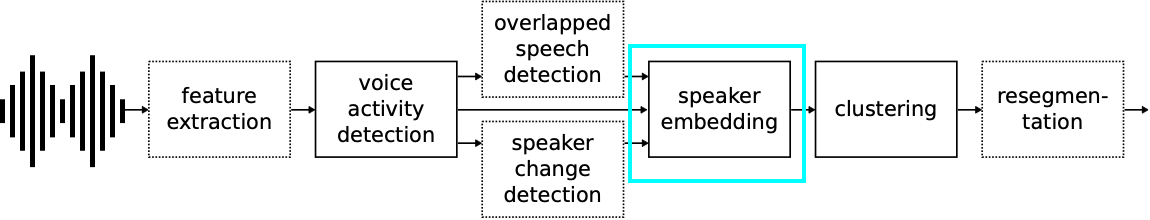

Figura - 8
</div>

<div align='justify'>

Nesta camada do modelo a etapa de Pooling é adicionado ao PyanNet (figura 4). Ela é responsável por coletar caractéristicas especificas de cada grupo de orador presente em determinado áudio. Assim, a etapa de clustering pode utilizar as saidas desta camada para decidir a que grupo pertence determinada faixa de audio.

**Embeddinsg** : Usamos os embeddings porque eles são ricos de informação do dado de entrada, e além disso são formas de representar dados de alta dimensionalidade em vetores contínuos de baixa dimensionalidade, o que diminui a computação. 
</div>

In [ ]:
!  cd /content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_embedding && cat config.yml

Treinando o modelo.

In [ ]:
!pyannote-audio emb train --subset=train --to=1 tutorials/models/speaker_embedding AMI.SpeakerDiarization.MixHeadset 

Validando o modelo.

In [ ]:
!pyannote-audio emb validate --subset=development --to=1 /content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_embedding/train/AMI.SpeakerDiarization.MixHeadset.train AMI.SpeakerDiarization.MixHeadset

Testando o modelo.

In [ ]:
!pyannote-audio emb apply --subset=test  /content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_embedding/train/AMI.SpeakerDiarization.MixHeadset.train/validate_diarization_fscore/AMI.SpeakerDiarization.MixHeadset.development AMI.SpeakerDiarization.MixHeadset

A etapa de teste do speaker embedding não retorna nenhum arquivo de visualização, apenas um arquivo de metadata.yml.

In [ ]:
!cd /content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_embedding/train/AMI.SpeakerDiarization.MixHeadset.train/validate_diarization_fscore/AMI.SpeakerDiarization.MixHeadset.development/apply/0001 && cat metadata.yml

## Como usar as redes treinadas para avaliar um áudio.

<div align="justify">

Agora que nós temos entendimento de como funciona cada camada do pipeline, e treinamos cada uma delas, podemos então usar as redes para visualizar graficamente como elas respondem a áudios do teste. 

</div>

### O arquivo de teste

<div align='justify'>

Uma coisa intrigante que descobri enquanto escrevia este tutorial, é que se você importar as bibliotecas antes de ir para o diretorio do arquivo database.yml, é que ele não vai reconhecer o diretório. Por isso esta etapa de ir para o diretório antes de importar é estremamente importante. *Faça o teste, troque a ordem das coisas, provavelmente vai lançar umerro*.

</div>

In [ ]:
%cd drive/MyDrive/TutorialPyannote/

Agora vamos importar os arquivo e carregar o protocolo que vai usar o pre-processador de encontrar o arquivo de áudio.

In [ ]:
from pyannote.database import get_protocol
from pyannote.database import FileFinder
from pyannote.database import Protocol


In [ ]:
preprocessor = {'audio':FileFinder()}
protocol = get_protocol('AMI.SpeakerDiarization.MixHeadset',preprocessors=preprocessor)




E vamos puxar um arquivo para testar as redes treinadas até aqui.

In [ ]:
test_file = next(protocol.test())

Caso algum erro ocorra, reinicie o tempo de execução, e rode desde o começo desta seção, na ordem original.

### Configuração 

In [ ]:
from pyannote.audio.features import Pretrained
import torch
from pyannote.audio.utils.signal import Binarize
from pyannote.core import Segment, notebook
from pyannote.audio.utils.signal import Peak
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import dia
from pyannote.core import SlidingWindowFeature

#função auxiliar que vai aplicar uma escala na pontuação para visualização dos dados
plot_ready = lambda scores: SlidingWindowFeature(np.exp(scores.data[:,1:]),scores.sliding_window)

### Speech Activity Detection 

A seguinte linha de código carrega a rede neural treinada para detecção de atividade de voz.

In [ ]:
sad = Pretrained("/content/drive/MyDrive/TutorialPyannote/tutorials/models/speech_activity_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_detection_fscore/AMI.SpeakerDiarization.MixHeadset.development")


Agora que temos nosso modelo, basta que aplicamos o arquivo teste.

In [ ]:
sad_scores = sad(test_file)

Precisamos de uma instancia de um Binarize, uma classe que auxilia na leitura dos scores, nos gerando os momentos em que houve fala ou não. Para isso precisamos verificar o conteudo do arquivo gerado pela validação, ele nos indica os parâmetros para a classe Binarize.

In [ ]:
%cat /content/drive/MyDrive/TutorialPyannote/tutorials/models/speech_activity_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_detection_fscore/AMI.SpeakerDiarization.MixHeadset.development/params.yml

In [ ]:
binarize = Binarize(offset=0.9918,onset=0.9918,log_scale=True,min_duration_off=0.1,min_duration_on=0.1)

Agora conseguimos ter os momentos onde há fala no arquivo de teste.

In [ ]:
speech = binarize.apply(sad_scores,dimension=1)

Vamos visualizar como fica os momentos preditos de fala de acordo com a referência.

In [ ]:

fig,ax = plt.subplots(nrows=3)
fig.set_figheight(3*2)
#plotanto a referencia
notebook.plot_annotation(test_file['annotation'],ax=ax[0],time=False)
ax[0].text(notebook.crop.start+0.5,0.1,'reference',fontsize=14)
#plotando a pontuação
notebook.plot_feature(plot_ready(sad_scores),ax=ax[1],time=False)
#plotando a predição
notebook.plot_timeline(speech,ax=ax[2])
ax[2].text(notebook.crop.start+0.5,0.1,'predict speech moments', fontsize=12);


O resultado não está bom, mas isso é porque o modelo foi treinado apenas por 1 época. Já que um treino maior demandaria muito mais tempo.

### Speaker Change Detection

A seguinte linha de código carrega a rede neural treinada para detectar mudança de orador.

In [ ]:
scd = Pretrained("/content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_change_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_segmentation_fscore/AMI.SpeakerDiarization.MixHeadset.development")


Podemos coletar os scores

In [ ]:
scd_scores = scd(test_file)

Assim como no Speech Activity Detection, temos que utilizar de uma classe para ler os scores e nos retornar a informação. A classe usada para essa rede é a Peak. Para configurar a classe usamos os parâmetros disponibilizados pelo procedimento de validação.

In [ ]:
%cat /content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_change_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_segmentation_fscore/AMI.SpeakerDiarization.MixHeadset.development/params.yml

In [ ]:
peak = Peak(alpha=0.9918,min_duration=0.1,log_scale=True)

Com ela podemos então ter as informações de detecção de mudança de orador.

In [ ]:
partition = peak.apply(scd_scores,dimension=1)

Assim como na rede de detecção de fala, aqui também podemos visualizar as predições de troca de falante.

In [ ]:

fig,ax = plt.subplots(nrows=3)
fig.set_figheight(3*2)
#plotanto a referencia
notebook.plot_annotation(test_file['annotation'],ax=ax[0],time=False)
ax[0].text(notebook.crop.start+0.5,0.1,'reference',fontsize=14)
#plotando a pontuação
notebook.plot_feature(plot_ready(scd_scores),ax=ax[1],time=False)
#plotando a predição
notebook.plot_timeline(partition,ax=ax[2])
ax[2].text(notebook.crop.start+0.5,0.1,'predict speech moments', fontsize=12);

Assim como falamos na seção passada, o resultado evidentemente não é bom, ele não identificou nenhuma troca de orador, e baseado na referência há pelo menos 9 trocas. 

É obvio que o motivo deste resultado é devido ao pouco tempo de treinamento.

### Overlap Detection

A seguinte linha de código carrega a rede neural treinada para detectar sobreposição de oradores.

In [ ]:
olp = Pretrained("/content/drive/MyDrive/TutorialPyannote/tutorials/models/overlap_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_detection_fscore/AMI.SpeakerDiarization.MixHeadset.development")

Basta aplicar a rede no dado de teste, como já foi feito nos outros casos.

In [ ]:
olp_scores = olp(test_file)

Para esse caso, usamos também a classe Binarize para leitura dos scores. E novamente necessitamos de verificar os parâmetros.

In [ ]:
%cat /content/drive/MyDrive/TutorialPyannote/tutorials/models/overlap_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_detection_fscore/AMI.SpeakerDiarization.MixHeadset.development/params.yml

In [ ]:
binarize = Binarize(offset=0.62, onset=0.62, log_scale=True, 
                    min_duration_off=0.1, min_duration_on=0.1)

E conseguimos agora então, ter a informação das regiões de troca de orador.

In [ ]:
overlap = binarize.apply(olp_scores, dimension=1)

E novamente vamos visualizar como ficou a predição de sobreposição.

In [ ]:

fig,ax = plt.subplots(nrows=3)
fig.set_figheight(3*2)
#plotanto a referencia
notebook.plot_annotation(test_file['annotation'],ax=ax[0],time=False)
ax[0].text(notebook.crop.start+0.5,0.1,'reference',fontsize=14)
#plotando a pontuação
notebook.plot_feature(plot_ready(olp_scores),ax=ax[1],time=False)
#plotando a predição
notebook.plot_timeline(overlap,ax=ax[2])
ax[2].text(notebook.crop.start+0.5,0.1,'predict speech moments', fontsize=12);

<div align='justify'>

Logicamente, a predição está 100% correta, pois não foi identificado sobreposição, quando há sobreposição os labels são paralelos. 

Outra observação é que os dados da VALE não possuem sobreposição como rótulo, não adotamos essa politica, na realiade, eles são classificados como uma nova classe.

</div>

### Speaker Embeddings

<div align='justify'>

A etapa do Speaker Embeddings é relativamente mais complicada do que as anteriores. 

Começamos puxando o modelo salvo, como nas outras etapas.
</div>

In [ ]:
emb = Pretrained("/content/drive/MyDrive/TutorialPyannote/tutorials/models/speech_activity_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_detection_fscore/AMI.SpeakerDiarization.MixHeadset.development")

Coletamos os embeddings.

In [ ]:
embeddings = emb(test_file)

<div align='justify'> 

Nós queremos coletar os embeddings de cada segmento de fala que foi previsto pelo modelo, de forma a predizer o orador naquele momento, para tal, vamos utilizar das predições da subrede SAD (Speech Activity Detection) e a SCD (Speaker Change Detection), para definir esses segmentos de fala.

</div>

In [ ]:
segments_of_speech = partition.crop(speech);

<div align='justify'> 

O código acima utiliza da partição calculada pela rede SCD, com os momentos de troca de oradores, e faz a "interseção" inteligente com os segmentos de fala presente em speech, de forma a originar como saída todos os segmentos de falas, com seus respectivos diferentes oradores.

Agora podemos separar os embeddings de cada segmento de fala que encontramos.
</div>

In [ ]:
def EmbeddingCropSegments(segments_of_speech,test_file,emb):
  X,Y = [],[]
  
  embeddings = emb(test_file)
  for segment in segments_of_speech:
    #Cortar os embeddings do segmento atual de acordo com 3 possíveis modos
    #Center é o melhor, entretanto pode retornar resultados vazios
    #Por isso vamos passar por todos os modos de corte, e então escolher o que for
    #Diferente de vazio.

    embeddings_mode_crop = {mode:embeddings.crop(segment,mode=mode) for mode in ['center','loose','strict']}

    if len(embeddings_mode_crop['center'])>0 :
      x = embeddings_mode_crop['center']
    elif len(embeddings_mode_crop['loose']) > 0:
      x = embeddings_mode_crop['loose']
    else :
      x = embeddings_mode_crop['strict']

    #vamos manter o rotulo do embedding (sua categoria) de acordo com o previsto pro segmento

    y=test_file['annotation'].argmax(segment)

    #infelizmente o modelo pode prever segmentos que não estão presentes no audio
  
    if y is not None:
      #calcula a média dos embeddings pelo eixo das linhas
      X.append(np.mean(x,axis=0))
      Y.append(y)
  
  return X,Y

In [ ]:
X,Y = EmbeddingCropSegments(segments_of_speech,test_file,emb)

Temos então os embeddings por segmentos, e podemos visualizar eles como o TSNE.

In [ ]:
from sklearn.manifold import TSNE

A função abaixo é responsável por plotar os embeddings calculados pelos segmentos

In [ ]:
def plotEmbeddings(X,y_true):
  #instancia o TSNE para converter os embeddings para visualização
  tsne = TSNE(n_components=2, metric='cosine')

  X_2d = tsne.fit_transform(X)

  plt.scatter(*X_2d.T, c=y_true)
  plt.title("Embeddings")
  plt.show()
  

Vamos tentar plotar os embeddings, se der erro e o gráfico ficar em branco é que não houve embeddings para ser plotado. Isso pode acontecer pois estamos treinando os modelos apenas por 1 época, o que pode não ser suficiente para ele aprender as tarefas.

In [ ]:
_,y_true = np.unique(Y,return_inverse=True)

<div align='justify'>

Para mostrar melhor o funcionamento desses passos, e como os embeddings se parecem com o TSNE, vou pegar emprestado uns modelos pretreinados disponíveis do pyannote. Essa etapa é para visualizarmos melhor os modelos, pois como os treinos são de poucas épocas, é possível que eles não consigam prever nenhuma fala no áudio de teste.

</div>

#### Aproveitando modelos pretreinados

In [ ]:
torch.hub.list('pyannote/pyannote-audio')

<div align='justify'>

Se o leitor olhar com atenção temos modelos pretreinados para cada etapa do pipeline. 

Vamos usar agora esses modelos pretreinados para mostrar o funcionamento. 

</div>


In [ ]:
emb2 = torch.hub.load('pyannote/pyannote-audio','emb_voxceleb')

In [ ]:
sad2 = torch.hub.load('pyannote/pyannote-audio','sad_ami')

In [ ]:
scd2 = torch.hub.load('pyannote/pyannote-audio','scd_ami')

Agora podemos refazer os processos.

##### SPEECH

In [ ]:
sad_scores2 = sad2(test_file)

binarize = Binarize(log_scale=True) #usar parametros default

speech = binarize.apply(sad_scores2,dimension=1)

##### CHANGE SPEAKER

In [ ]:
scd_scores2 = scd2(test_file)

peak = Peak() #usar parametros default

partition = peak.apply(scd_scores2)

##### VISUALIZATION

In [ ]:
fig,ax = plt.subplots(nrows=3)
fig.set_figwidth(10)
fig.set_figheight(10)
notebook.plot_annotation(test_file['annotation'],ax=ax[0])
ax[0].text(notebook.crop.start+0.5,0.1,'reference')

notebook.plot_timeline(speech,ax=ax[1])
ax[1].text(notebook.crop.start+0.5,0.1,'segments predict')

notebook.plot_timeline(partition, ax=ax[2])
ax[2].text(notebook.crop.start+0.5,0.1,'changes predict');

<div align='justify'>

Podemos ver que o modelo que ja foi treinado anteriormente em algum conjunto de dados, respondeu melhor do que um modelo treinado por apenas uma epoca nos nossos dados. Entretanto ele ainda não é o melhor modelo para predizer em nossos dados, é necessário uma etapa de ajuste com os dados que estamos usando.

</div>

##### EMBEDDINGS

In [ ]:
segments_of_speech = partition.crop(speech)

In [ ]:
X,Y = EmbeddingCropSegments(segments_of_speech,test_file,emb)

In [ ]:
_,y_true = np.unique(Y,return_inverse=True)

plotEmbeddings(X,y_true)

Agora podemos ver os embeddings, afinal, conseguimos prever alguns segmentos de fala no audio de teste, utilizando os modelos pretreinados.

## Finetune, ajustando modelos pretreinados 

<div align='justify'>

Vimos anteriormente como treinar os modelos do pipeline do zero com nossos dados, e vimos que um treino de uma época trouxe resultados nada satisfatório ao nosso experimento. Entretanto quando usamos os modelos pretreinados, mesmo sem treinar eles aos nossos dados, vimos que eles trouxeram respostas razoáveis para o experimento.


Como podemos utilizar esses modelos pretreinados de forma otima com nossos dados? O finetune (ajuste fino). 

**Finetune** : processo de retreinar o modelo previamente treinado (com outros dados) nos dados de interesse. 



</div>

### SAD (Speech Activity Detection)

O processo de finetune é muito semelhante ao de treinamento, mas vamos utilizar uma nova tag :). 


```
--pretrained
```

<div align='justify'>

Nesse ponto nós temos algumas opções, podemos usar um caminho, esse caminho leva diretamente aos pesos de melhor resultado. Ou podemos usar um modelo do hub, do qual foram citados anteriormente, nesse caso podemos fazer apenas **sad_ami** por exemplo.

<ul> <b>Exemplos de uso</b>

<li><b>Caminho :</b> --pretrained=PATH/TO/THE/BEST/WEIGHT</li>
<li><b>Modelo do hub :</b> --pretrained=sad_ami

</ul>

</div>


#### Usando o caminho

Nesse momento nós vamos tentar achar o melhor peso para nossa rede baseada no nosso treinamento antigo.

In [ ]:
!cd /content/drive/MyDrive/TutorialPyannote/tutorials/models/speech_activity_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_detection_fscore/AMI.SpeakerDiarization.MixHeadset.development/apply && ls

O resultado do código acima é o peso que devemos utilizar para realizar o finetune.


In [ ]:
from pathlib import Path
if str(Path.cwd())!="/content/drive/MyDrive/TutorialPyannote":
  %cd /content/drive/MyDrive/TutorialPyannote

In [ ]:
!pyannote-audio sad train --pretrained=/content/drive/MyDrive/TutorialPyannote/tutorials/models/speech_activity_detection/train/AMI.SpeakerDiarization.MixHeadset.train/weights/0001.pt --subset=train --to=1 tutorials/finetune/sad_fine AMI.SpeakerDiarization.MixHeadset

pronto você acabou de aplicar o finetune com a opção de caminho, o processo a partir daqui é o mesmo lecionado nas seções de treino.

#### Usando modelos do hub

##### CASO VOCÊ TENHA PROBLEMA COM HUBCONF.PY

Para evitar problemas precisamos garantir que o arquivo hubconf esteja na cache do pyannote.

Vai até o site [hubconf.py](https://github.com/pyannote/pyannote-audio/blob/master/hubconf.py) copie o código e crie um arquivo com o conteudo dentro de qualquer pasta, vou fazer isso no content.

In [ ]:
%cp /content/hubconf.py /root/.cache/torch/hub/pyannote_pyannote-audio_develop/

O código acima copia a pasta para o caminho da cache do pyannote.

##### FINETUNE 

In [ ]:
! yes | pyannote-audio sad train --pretrained=sad_ami --to=1 tutorials/finetune/sad_fine AMI.SpeakerDiarization.MixHeadset 

Nesse caso estamos usando o modelo SAD que foi pretrainado nos dados publicos do AMI, entretanto poderia utilizar qualquer modelo disponível no hub do pyannote.

Agora só validar o modelo e seguir o resto que foi ensinado nas seções de treinamento.

### SCD (Speaker Change Detection)

#### Usando o caminho

Verificando o melhor peso do modelo.

In [ ]:
!cd /content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_change_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_segmentation_fscore/AMI.SpeakerDiarization.MixHeadset.development/apply && ls

Iniciando o ajuste fino.

In [ ]:
!pyannote-audio scd train --pretrained=/content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_change_detection/train/AMI.SpeakerDiarization.MixHeadset.train/weights/0001.pt --subset=train --to=1 tutorials/finetune/scd_fine AMI.SpeakerDiarization.MixHeadset

Processo de validação e afins é o mesmo que ensinado nas seções passadas.

#### Usando modelos do hub

Agora é direto!!

In [ ]:
! yes | pyannote-audio scd train --pretrained=scd_ami --subset=train --to=1 tutorials/finetune/scd_fine AMI.SpeakerDiarization.MixHeadset

Caso tenha problema com a execução desse passo retorne na seção passada!

Agora é só seguir o processo de validação normalmente.

### EMB (Speaker Embeddings)

#### Usando o caminho

Verificando o melhor peso do modelo.

In [ ]:
!cd /content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_embedding/train/AMI.SpeakerDiarization.MixHeadset.train/validate_diarization_fscore/AMI.SpeakerDiarization.MixHeadset.development/apply && ls

Agora é só chamar o pyannote para fazer o trabalho bruto.

In [ ]:
!pyannote-audio emb train --pretrained=/content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_embedding/train/AMI.SpeakerDiarization.MixHeadset.train/weights/0001.pt --subset=train --to=1 tutorials/finetune/emb_fine AMI.SpeakerDiarization.MixHeadset

#### Usando modelos do hub

Novamente direto!!! Caso tenha problemas volte nas seções anteriores.

In [ ]:
!pyannote-audio emb train --pretrained=emb_ami --subset=train --to=1 tutorials/finetune/emb_fine AMI.SpeakerDiarization.MixHeadset

Finalizado o treinamento continue com os processos seguintes.

#### Observações

Você pode ter percebido que não ajustamos o modelo OVP (Overlap Detection), isso é porque ele não entra diretamente no pipeline de diarização. O uso do overlap vai depender de como você trata o seu problema.

## Criando o Pipeline de Diarização

<div align='justify'>

Se você chegou até aqui é porque aprendeu a como treinar o seu modelo do zero ou então a aplicar o ajuste fino. 

Você visualizou cada comportamento individual de cada rede do pipeline, mas e agora, como prosseguir? Nessa seção vou ensinar você a construir o pipeline de diarização usando os modelos que foram treinados nas seções anteriores.

</div>



### Configuração

<div align='justify'>

É muito importante que você tenha feito a etapa de teste, ou seja, a etapa de apply de todas as camadas, mas explicitamente da SAD, SCD e EMB. Vamos configurar um arquivo de configuração, para ajustar o pipeline de diarização.

</div>

In [ ]:
from pathlib import Path 

if Path.cwd() != "/content/drive/MyDrive/TutorialPyannote":
  %cd /content/drive/MyDrive/TutorialPyannote

In [ ]:
%cat tutorials/pipelines/speaker_diarization/config.yml

<div align='justify'>

Vamos configurar o arquivo acima com os diretorios pertinentes de cada subrede do pipeline. 

<ul> <b>Subredes (params)</b>

<li>
  <b>sad_model :</b> aqui você deve colocar o caminho da pasta de melhor desempenho do procedimento de apply para o modelo de Speech Detection. ex path/to/apply/0001
</li>
<li>
  <b>scd_model :</b>aqui você deve colocar o caminho da pasta de melhor desempenho do procedimento de apply para o modelo de Speaker Change Detection. ex path/to/apply/0001
</li>
<li>
  <b>emb_model :</b>aqui você deve colocar o caminho da pasta de melhor desempenho do procedimento de apply para o modelo de Speaker Embeddings. ex path/to/apply/0001
</li>

</ul>

<b>Freeze :  </b> Aqui você pode configurar se deseja congelar os parâmetros de alguma subrede do pipeline, isso pode ser feito como mostrado no próprio arquivo de configuração.

<b>Preprocessors: </b> Nessa parte você precisa apenas colocar o seu caminho para o arquivo de configuração de conjunto de dados.

</div>


Abra o arquivo aqui no próprio colab e faça as alterações. Ele deve ficar parecido com isso:

In [ ]:
%cat tutorials/pipelines/speaker_diarization/config_esperado.yml

### Ajustando o pipeline

Agora vamos aplicar um processo de ajuste, que consiste no treinamento infinito do pipeline.

In [ ]:
!pyannote-pipeline train --subset=development --forever tutorials/pipelines/speaker_diarization/ AMI.SpeakerDiarization.MixHeadset 

O pipeline vai treinar indefinidamente, e quanto mais tempo ficar no processo mais ele se ajusta os parâmetros e tende se comportar melhor aos dados. 

Você pode ver os parâmetros de todo o pipeline aqui:


In [ ]:
%cat tutorials/pipelines/speaker_diarization/train/AMI.SpeakerDiarization.MixHeadset.development

Depois de treinar o pipeline você pode aplicar ele para ver como ele se comporta aos seus dados.

In [ ]:
!pyannote-pipeline apply --subset=test tutorials/pipelines/speaker_diarization/train/AMI.SpeakerDiarization.MixHeadset.development 

E podemos visualizar o comportamento usando o pyannote-metrics.

In [ ]:
pyannote-metrics diarization AMI.SpeakerDiarization.MixHeadset tutorials/pipelines/speaker_diarization/train/AMI.SpeakerDiarization.MixHeadset.development/apply/latest/AMI.SpeakerDiarization.MixHeadset.test.rttm

Pronto, você acabou de preparar o seu pipeline para aplicações!!

### Usando o pipeline dentro do código python

### Configuração

In [ ]:
from pyannote.audio.pipeline import SpeakerDiarization

### Construindo o pipeline

Primeiramente carregamos os modelos individuais, usando os diretórios de validação para isso.

In [ ]:
sad="/content/drive/MyDrive/TutorialPyannote/tutorials/models/speech_activity_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_detection_fscore/AMI.SpeakerDiarization.MixHeadset.development"
scd="/content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_change_detection/train/AMI.SpeakerDiarization.MixHeadset.train/validate_segmentation_fscore/AMI.SpeakerDiarization.MixHeadset.development"
emb="/content/drive/MyDrive/TutorialPyannote/tutorials/models/speaker_embedding/train/AMI.SpeakerDiarization.MixHeadset.train/validate_diarization_fscore/AMI.SpeakerDiarization.MixHeadset.development"

Depois instanciamos o pipeline com os modelos carregados, usando da forma a seguir.

In [ ]:
pipeline = SpeakerDiarization(sad_scores=sad,
                              scd_scores=scd,
                              embedding=emb,
                              method="affinity_propagtion");

Agora carregamos ao pipeline os parâmetros de treino que conseguimos na seção anterior no processo de treino de toda a pipeline.

In [ ]:
pipeline.load_params("/content/drive/MyDrive/TutorialPyannote/tutorials/pipelines/speaker_diarization/train/AMI.SpeakerDiarization.MixHeadset.development/params.yml")

### Usando o pipeline

Com a pipeline construida agora é simples de realizar o seu uso.

In [ ]:
test_file = next(protocol.test())
diarization = pipeline(test_file)

Podemos visualizar a saida do pipeline e verificar se a predição está conforme a referência.

In [ ]:
fig,ax = plt.subplots(nrows=2)
fig.set_figwidth(20)
fig.set_figheight(8)

#a referência do audio 
notebook.plot_annotation(test_file['annotation'],ax=ax[0],time=False)
ax[0].text(notebook.crop.start+0.5,0.1,'reference')
#a predição
notebook.plot_annotation(diarization,ax=ax[1])
ax[1].text(notebook.crop.start+0.5,0.1,'predict');

# Conclusão

<div align='justify'>

Nesse tutorial você aprendeu como funciona o pipeline de diarização de locutor do Pyannote, e como cada rede presente no conjunto trabalha de forma individual. 

Além disso, aprendeu como treinar cada rede do zero, também como aplicar o ajuste fino dos modelos pretreinados.

Por fim, também foi capaz de ajustar todo o pipeline unindo todas as redes, ajustando todos os parâmetros dos modelos. Assim sendo possível aplicar o pipeline via terminal, usando o pyannote-metrics para visualizar as metricas, ou então usando dentro do python, e plotando a saida do pipeline.

</div>

<div align='center'>

<img src="https://i.pinimg.com/originals/fe/31/a5/fe31a5bdfaf021497580dca22534eb83.gif" width="500" height="200" />

</div>

Existe um mundo de funcionalidades dentro do [Pyannote](http://pyannote.github.io/), fique de olho no repósitorio deles, além disso Pyannote2.0 está por vir, e promete modelos mais robustos! 